In [1]:
import myplotlib
import matplotlib.pyplot as plt
import tri

myplotlib.load("hershey")

In [2]:
# Change this to the path where your data is stored
PATH = "output"

In [3]:
# First combine the hdf5 files into a single file for faster loading
tri.CombineH5Files(PATH)

In [4]:
# Load the spectra at different times
spectra = tri.get(f"{PATH}/data.h5")
spectra

<xarray.Dataset>
Dimensions:  (t: 19, e: 200)
Coordinates:
  * t        (t) int64 0 100 200 300 400 500 ... 1300 1400 1500 1600 1700 1800
  * e        (e) float32 0.0001035 0.0001109 0.0001189 ... 84.14 90.16 96.61
Data variables:
    n1       (t, e) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    n2       (t, e) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    n3       (t, e) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
Attributes: (12/129)
    NumSteps:                  19
    algorithm:c:               0.45
    algorithm:corr:            1.025
    algorithm:currdeposit:     0
    algorithm:fieldsolver:     0
    algorithm:nfilter:         0
    ...                        ...
    slice_output:sliceY_1:     -1.0
    slice_output:sliceZ_1:     -1.0
    slice_output:start:        0
    time:last:                 5000
    time:wall_t_max:           0.0
    timestep:                  0

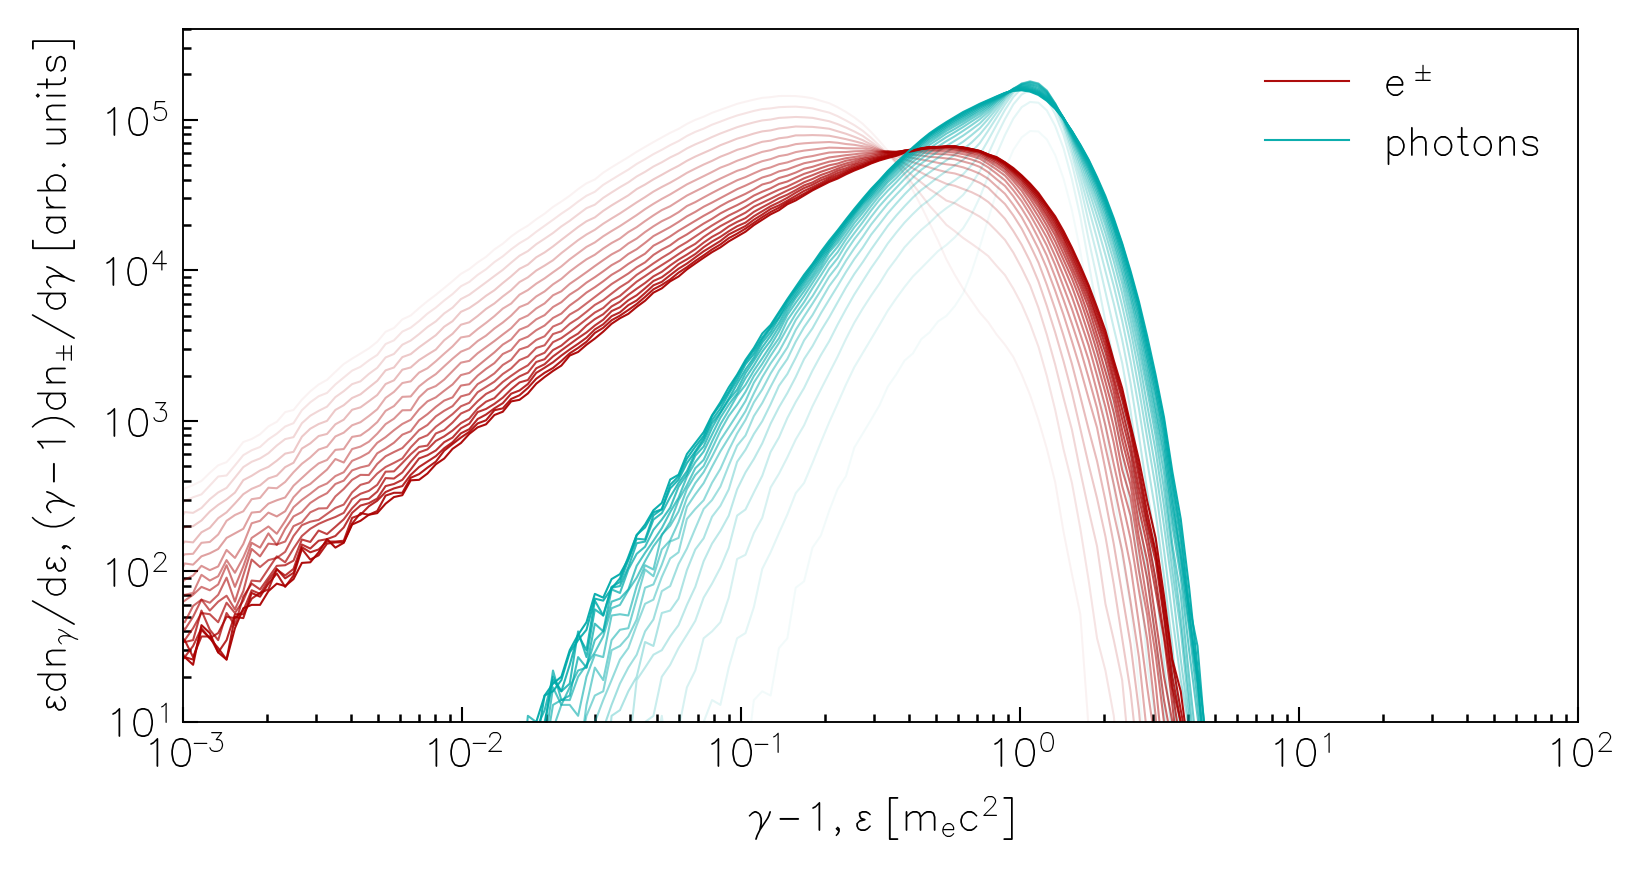

In [5]:
# Plotting the photon and electron/positron distribution functions at different times (opacity is proportional to time)

fig = plt.figure(figsize=(6, 3), dpi=300)
ax = fig.add_subplot(111)
for i, t in enumerate(spectra.t):
    ax.plot(
        spectra.e,
        (spectra.n1 + spectra.n2).sel(t=t),
        c="C1",
        alpha=(i / len(spectra.t)),
        label=r"$e^\pm$" if i == len(spectra.t) - 1 else None,
    )
    ax.plot(
        spectra.e,
        spectra.n3.sel(t=t),
        c="C5",
        alpha=(i / len(spectra.t)),
        label="photons" if i == len(spectra.t) - 1 else None,
    )

ax.set(
    xscale="log",
    yscale="log",
    xlim=(1e-3, 1e2),
    ylim=(10, 4e5),
    xlabel=r"$\gamma-1$, $\varepsilon$ [$m_e c^2$]",
    ylabel=r"$\varepsilon dn_\gamma/d\varepsilon$, $(\gamma-1) dn_{\pm}/d\gamma$ [arb. units]",
)
ax.legend();